# Data Processing

### Preparing/Merging data

In [1]:
import pandas as pd

In [2]:
house_data = pd.read_excel('resd_data.xlsx')

In [3]:
house_data

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,field_StoriesTotal,field_PostalCode,ListPrice
0,1549.0,5825.0,1974.0,3.0,2.0,1.0,92624.0,3300.0
1,1196.0,7900.0,1981.0,3.0,2.0,1.0,92316.0,1600.0
2,2502.0,11326.0,1998.0,4.0,3.0,NaN,92211.0,649900.0
3,3884.0,16013.0,1978.0,3.0,3.0,1.0,90274.0,2599000.0
4,888.0,1806.0,1946.0,2.0,2.0,NaN,92651.0,3500.0
...,...,...,...,...,...,...,...,...
9995,520.0,0.0,2000.0,1.0,1.0,NaN,91745.0,47000.0
9996,0.0,9596.0,NaN,0.0,0.0,NaN,90029.0,1350000.0
9997,10000.0,20909.0,1996.0,6.0,9.0,NaN,92651.0,51000000.0
9998,1289.0,0.0,1996.0,3.0,3.0,NaN,92656.0,2800.0


In [4]:
##Importing a dataset with population by zipcode
population = pd.read_excel('population.xlsx')

In [5]:
population

,zipcode,population
0,90011,108051
1,90650,106404
2,91331,105696
3,90201,102878
4,92335,99791
...,...,...
1553,95923,16
1554,92332,11
1555,93530,10
1556,95430,6


In [6]:
#Merging data: left 
merged_left = pd.merge(left=house_data, right=population, left_on='field_PostalCode', right_on='zipcode', how='left') #how: inner, outer, left, right

In [7]:
merged_left

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,field_StoriesTotal,field_PostalCode,ListPrice,zipcode,population
0,1549.0,5825.0,1974.0,3.0,2.0,1.0,92624.0,3300.0,92624.0,6314.0
1,1196.0,7900.0,1981.0,3.0,2.0,1.0,92316.0,1600.0,92316.0,29304.0
2,2502.0,11326.0,1998.0,4.0,3.0,NaN,92211.0,649900.0,92211.0,25015.0
3,3884.0,16013.0,1978.0,3.0,3.0,1.0,90274.0,2599000.0,90274.0,25374.0
4,888.0,1806.0,1946.0,2.0,2.0,NaN,92651.0,3500.0,92651.0,24828.0
...,...,...,...,...,...,...,...,...,...,...
9995,520.0,0.0,2000.0,1.0,1.0,NaN,91745.0,47000.0,91745.0,54166.0
9996,0.0,9596.0,NaN,0.0,0.0,NaN,90029.0,1350000.0,90029.0,38843.0
9997,10000.0,20909.0,1996.0,6.0,9.0,NaN,92651.0,51000000.0,92651.0,24828.0
9998,1289.0,0.0,1996.0,3.0,3.0,NaN,92656.0,2800.0,92656.0,52372.0


In [8]:
pd.isnull(merged_left['population']).value_counts() ## how many values are in the first, but not in the second table
#how many 'population' observation are empty

False    9718
True      282
Name: population, dtype: int64

In [9]:
#Importing a second data set with the total_income by zipcode
data = pd.read_csv('irs_17.csv')

In [10]:
data

,STATEFIPS,STATE,zipcode,agi_stub,N1,mars1,MARS2,MARS4,ELF,CPREP,...,N85300,A85300,N11901,A11901,N11900,A11900,N11902,A11902,N12000,A12000
0,1,AL,0,1,802640.0,474470.0,99850.0,216600.0,717050.0,44090.0,...,0.0,0.0,64680.0,53602.0,700940.0,1803125.0,698100.0,1796343.0,2860.0,4917.0
1,1,AL,0,2,499070.0,218590.0,137460.0,129760.0,448190.0,26230.0,...,0.0,0.0,77660.0,118725.0,419640.0,1175607.0,416180.0,1165352.0,4250.0,8894.0
2,1,AL,0,3,268590.0,89780.0,134440.0,38280.0,241060.0,14160.0,...,0.0,0.0,67820.0,156752.0,201030.0,560461.0,197060.0,547812.0,5440.0,13482.0
3,1,AL,0,4,170880.0,32180.0,124070.0,11660.0,154120.0,7980.0,...,0.0,0.0,48440.0,141721.0,121930.0,396526.0,118460.0,383588.0,3160.0,12369.0
4,1,AL,0,5,229870.0,22810.0,196990.0,5540.0,208380.0,11120.0,...,50.0,19.0,91100.0,465160.0,138250.0,588068.0,130970.0,529001.0,8430.0,55564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166532,56,WY,99999,2,3630.0,2040.0,1030.0,440.0,3240.0,160.0,...,0.0,0.0,550.0,889.0,2960.0,7332.0,2890.0,7127.0,60.0,70.0
166533,56,WY,99999,3,2470.0,1020.0,1220.0,200.0,2230.0,120.0,...,0.0,0.0,570.0,1258.0,1810.0,5299.0,1740.0,5020.0,70.0,164.0
166534,56,WY,99999,4,1820.0,520.0,1200.0,100.0,1680.0,80.0,...,0.0,0.0,440.0,1644.0,1300.0,4643.0,1250.0,4069.0,50.0,197.0
166535,56,WY,99999,5,2480.0,390.0,2020.0,80.0,2290.0,130.0,...,0.0,0.0,820.0,4527.0,1570.0,7633.0,1410.0,6069.0,170.0,1189.0


In [11]:
# We keep state, zipcode, and total_income
income = data[['STATE','zipcode','A02650']]

In [12]:
income

,STATE,zipcode,A02650
0,AL,0,10626881.0
1,AL,0,18153235.0
2,AL,0,16659518.0
3,AL,0,14951547.0
4,AL,0,31461757.0
...,...,...,...
166532,WY,99999,133833.0
166533,WY,99999,153790.0
166534,WY,99999,159192.0
166535,WY,99999,333132.0


In [13]:
income = income.rename(columns={"STATE":"state","A02650": "total_income"})
income

,state,zipcode,total_income
0,AL,0,10626881.0
1,AL,0,18153235.0
2,AL,0,16659518.0
3,AL,0,14951547.0
4,AL,0,31461757.0
...,...,...,...
166532,WY,99999,133833.0
166533,WY,99999,153790.0
166534,WY,99999,159192.0
166535,WY,99999,333132.0


In [14]:
#checking how many observation California have
income['state'].value_counts()

TX    9726
NY    9222
CA    8867
PA    8213
IL    7386
OH    5987
FL    5520
MI    5346
MO    5343
IA    4960
VA    4770
MN    4744
NC    4350
WI    4282
IN    4044
GA    4002
KY    3924
KS    3564
TN    3540
AL    3456
OK    3282
NJ    3282
WV    3048
WA    2976
AR    2943
NE    2922
MA    2892
LA    2700
MD    2436
CO    2364
SC    2244
ME    2220
MS    2219
OR    2123
AZ    1770
SD    1740
ND    1691
CT    1584
VT    1421
NH    1386
MT    1343
ID    1296
NM    1251
UT    1134
NV     768
WY     654
RI     426
HI     360
DE     342
AK     330
DC     144
Name: state, dtype: int64

In [15]:
#We are going to keep only the observation from California
income = income[income['state'] == 'CA']
income = income.reset_index()
income = income.drop(columns=['index','state'])
income

,zipcode,total_income
0,0,77122619.0
1,0,155434589.0
2,0,149855891.0
3,0,135679764.0
4,0,356702150.0
...,...,...
8862,99999,3535657.0
8863,99999,3383049.0
8864,99999,2795759.0
8865,99999,6379311.0


In [16]:
import numpy as np

In [17]:
# Grouping by zipcode and sum by total_income, there are 6 observation
# for each zipcode due to the categorical variable 'Size of adjusted 
# gross income'. Each of the toal income belong to an income range.
# For instance, from 1 to $25,000, then from $25,000 to $50,000, so,
# we need to sum everything up to get our total income by zipcode.
income = income.pivot_table(values='total_income', index='zipcode', aggfunc=np.sum)
income = income.reset_index()
income

,zipcode,total_income
0,0,1.565874e+09
1,90001,6.563250e+05
2,90002,6.029240e+05
3,90003,7.796730e+05
4,90004,2.122307e+06
...,...,...
1473,96137,7.230800e+04
1474,96146,7.697600e+04
1475,96150,5.132420e+05
1476,96161,6.981640e+05


In [18]:
# previous merged
merged_left

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,field_StoriesTotal,field_PostalCode,ListPrice,zipcode,population
0,1549.0,5825.0,1974.0,3.0,2.0,1.0,92624.0,3300.0,92624.0,6314.0
1,1196.0,7900.0,1981.0,3.0,2.0,1.0,92316.0,1600.0,92316.0,29304.0
2,2502.0,11326.0,1998.0,4.0,3.0,NaN,92211.0,649900.0,92211.0,25015.0
3,3884.0,16013.0,1978.0,3.0,3.0,1.0,90274.0,2599000.0,90274.0,25374.0
4,888.0,1806.0,1946.0,2.0,2.0,NaN,92651.0,3500.0,92651.0,24828.0
...,...,...,...,...,...,...,...,...,...,...
9995,520.0,0.0,2000.0,1.0,1.0,NaN,91745.0,47000.0,91745.0,54166.0
9996,0.0,9596.0,NaN,0.0,0.0,NaN,90029.0,1350000.0,90029.0,38843.0
9997,10000.0,20909.0,1996.0,6.0,9.0,NaN,92651.0,51000000.0,92651.0,24828.0
9998,1289.0,0.0,1996.0,3.0,3.0,NaN,92656.0,2800.0,92656.0,52372.0


In [19]:
# putting all together
final_data = pd.merge(left=merged_left, right=income, on='zipcode', how='left')
final_data

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,field_StoriesTotal,field_PostalCode,ListPrice,zipcode,population,total_income
0,1549.0,5825.0,1974.0,3.0,2.0,1.0,92624.0,3300.0,92624.0,6314.0,427121.0
1,1196.0,7900.0,1981.0,3.0,2.0,1.0,92316.0,1600.0,92316.0,29304.0,536955.0
2,2502.0,11326.0,1998.0,4.0,3.0,NaN,92211.0,649900.0,92211.0,25015.0,1119783.0
3,3884.0,16013.0,1978.0,3.0,3.0,1.0,90274.0,2599000.0,90274.0,25374.0,4367172.0
4,888.0,1806.0,1946.0,2.0,2.0,NaN,92651.0,3500.0,92651.0,24828.0,3761231.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,520.0,0.0,2000.0,1.0,1.0,NaN,91745.0,47000.0,91745.0,54166.0,1775963.0
9996,0.0,9596.0,NaN,0.0,0.0,NaN,90029.0,1350000.0,90029.0,38843.0,670148.0
9997,10000.0,20909.0,1996.0,6.0,9.0,NaN,92651.0,51000000.0,92651.0,24828.0,3761231.0
9998,1289.0,0.0,1996.0,3.0,3.0,NaN,92656.0,2800.0,92656.0,52372.0,2639959.0


In [20]:
# just for curiosity, how many zipcodes we have
final_data['zipcode'].value_counts()

92253.0    174
92260.0    116
92262.0    113
92270.0    105
92264.0    103
          ... 
94611.0      1
93254.0      1
95497.0      1
93110.0      1
92173.0      1
Name: zipcode, Length: 659, dtype: int64

In [21]:
final_data = final_data.drop(columns='zipcode')


In [22]:
# how many observations were in the left table (merged) and are not
# in the right table (how many empty spaces we have in total_income)
pd.isnull(final_data['total_income']).value_counts()

False    9625
True      375
Name: total_income, dtype: int64

In [23]:
final_data = final_data.iloc[:,[0,1,2,3,4,5,8,9,7]]
final_data
# We got our final data

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,field_StoriesTotal,population,total_income,ListPrice
0,1549.0,5825.0,1974.0,3.0,2.0,1.0,6314.0,427121.0,3300.0
1,1196.0,7900.0,1981.0,3.0,2.0,1.0,29304.0,536955.0,1600.0
2,2502.0,11326.0,1998.0,4.0,3.0,NaN,25015.0,1119783.0,649900.0
3,3884.0,16013.0,1978.0,3.0,3.0,1.0,25374.0,4367172.0,2599000.0
4,888.0,1806.0,1946.0,2.0,2.0,NaN,24828.0,3761231.0,3500.0
...,...,...,...,...,...,...,...,...,...
9995,520.0,0.0,2000.0,1.0,1.0,NaN,54166.0,1775963.0,47000.0
9996,0.0,9596.0,NaN,0.0,0.0,NaN,38843.0,670148.0,1350000.0
9997,10000.0,20909.0,1996.0,6.0,9.0,NaN,24828.0,3761231.0,51000000.0
9998,1289.0,0.0,1996.0,3.0,3.0,NaN,52372.0,2639959.0,2800.0


In [24]:
#export_csv = final_data.to_csv(r'final_data.csv', index = None, header=True)

Keep in mind:
    * 282 empty values in population
    * 375 empty values in total_income

### Exploring Data

In [25]:
# Describing the data
final_data.describe()

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,field_StoriesTotal,population,total_income,ListPrice
count,9998.000000,9.998000e+03,9411.000000,9998.000000,9998.000000,6812.000000,9718.000000,9.625000e+03,9.998000e+03
mean,1931.688038,2.087269e+05,1975.571246,2.914183,2.483097,1.766882,39890.741202,1.641600e+06,7.962502e+05
std,1993.506568,5.383501e+06,83.226601,1.463516,1.487255,2.453856,21265.964665,1.206373e+06,1.559266e+06
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,63.000000,1.320100e+04,0.000000e+00
25%,1143.000000,5.000000e+03,1960.000000,2.000000,2.000000,1.000000,25015.000000,8.947890e+05,2.100000e+05
50%,1650.000000,7.405000e+03,1981.000000,3.000000,2.000000,1.000000,36362.000000,1.345045e+06,4.598500e+05
75%,2427.000000,1.395050e+04,2001.000000,4.000000,3.000000,2.000000,52372.000000,2.122307e+06,8.296218e+05
max,86448.000000,3.310560e+08,2018.000000,17.000000,25.000000,65.000000,108051.000000,8.005141e+06,5.100000e+07


We can see that most of the columns have a min value of 0.0, which indicates that something is wrong with those variables. It doesn't make sense to have a 'YearBuilt' of 0 or 0 bedrooms and bathrooms.

In [26]:
final_data.corr()

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,field_StoriesTotal,population,total_income,ListPrice
SquareFootageStructure,1.000000,-0.006804,0.064976,0.519756,0.626267,0.034244,-0.071739,0.171466,0.408695
LotSquareFootage,-0.006804,1.000000,0.006449,-0.008077,-0.002968,-0.001799,-0.006180,-0.004555,-0.001643
YearBuilt,0.064976,0.006449,1.000000,0.105202,0.134778,0.130007,0.002390,0.033335,0.021673
Bedrooms,0.519756,-0.008077,0.105202,1.000000,0.792865,-0.079238,0.046232,0.172457,0.263737
BathsTotal,0.626267,-0.002968,0.134778,0.792865,1.000000,0.034850,-0.085202,0.281201,0.462005
field_StoriesTotal,0.034244,-0.001799,0.130007,-0.079238,0.034850,1.000000,-0.099481,0.035251,0.017777
population,-0.071739,-0.006180,0.002390,0.046232,-0.085202,-0.099481,1.000000,0.182214,-0.121314
total_income,0.171466,-0.004555,0.033335,0.172457,0.281201,0.035251,0.182214,1.000000,0.280810
ListPrice,0.408695,-0.001643,0.021673,0.263737,0.462005,0.017777,-0.121314,0.280810,1.000000


There are two variables that have high correlation: number of Bedrooms and number of Bathrooms

In [27]:
# check non-values for each variable
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 9 columns):
SquareFootageStructure    9998 non-null float64
LotSquareFootage          9998 non-null float64
YearBuilt                 9411 non-null float64
Bedrooms                  9998 non-null float64
BathsTotal                9998 non-null float64
field_StoriesTotal        6812 non-null float64
population                9718 non-null float64
total_income              9625 non-null float64
ListPrice                 9998 non-null float64
dtypes: float64(9)
memory usage: 781.2 KB


In [28]:
# Actual number of NaN or missing values
np.sum(pd.isnull(final_data), axis=0)

SquareFootageStructure       2
LotSquareFootage             2
YearBuilt                  589
Bedrooms                     2
BathsTotal                   2
field_StoriesTotal        3188
population                 282
total_income               375
ListPrice                    2
dtype: int64

In [29]:
# Total missing values
np.sum(pd.isnull(final_data), axis = 0).sum()

4444

In [30]:
# Actual number of 0.0 values
np.sum(final_data == 0.0, axis = 0) 

SquareFootageStructure    1051
LotSquareFootage           683
YearBuilt                   15
Bedrooms                  1014
BathsTotal                 973
field_StoriesTotal         329
population                   0
total_income                 0
ListPrice                   13
dtype: int64

In [31]:
# Total 0 values
np.sum(final_data == 0.0, axis = 0).sum()

4078

We have a total of 4,444 missing values and a total of 4078 values of 0.0

In [32]:
#For instance ListPrice:
final_data[pd.isnull(final_data['ListPrice'])]

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,field_StoriesTotal,population,total_income,ListPrice
4617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
final_data[(final_data['ListPrice'] == 0.0) | (pd.isnull(final_data['ListPrice']))]

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,field_StoriesTotal,population,total_income,ListPrice
1421,0.0,11939.0,1912.0,0.0,0.0,2.0,26610.0,1390645.0,0.0
2450,0.0,66211.0,1999.0,0.0,0.0,1.0,39032.0,918219.0,0.0
4060,0.0,66211.0,1999.0,0.0,0.0,1.0,39032.0,918219.0,0.0
4617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5644,0.0,28314.0,NaN,0.0,0.0,NaN,47880.0,943747.0,0.0
6202,0.0,18295.0,NaN,0.0,0.0,NaN,94523.0,2080406.0,0.0
7148,0.0,14643.0,1987.0,0.0,0.0,NaN,34357.0,1439944.0,0.0
7685,0.0,20135.0,1955.0,0.0,0.0,NaN,20175.0,730982.0,0.0
7802,0.0,15347.0,1989.0,0.0,0.0,NaN,33422.0,1187534.0,0.0


In [34]:
from scipy import stats

In [35]:
final_zdata = pd.DataFrame()

In [36]:
# outliers criteria: more than 3 standard deviations
# How many outliers?
for col in final_data:
    col_zscore = col + '_zscore'
    final_data[col_zscore] = np.abs((final_data[col] - final_data[col].mean())/final_data[col].std(ddof=0))
#(np.abs(stats.zscore(final_data, axis = 1)))[-1] > 3

In [37]:
final_data

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,field_StoriesTotal,population,total_income,ListPrice,SquareFootageStructure_zscore,LotSquareFootage_zscore,YearBuilt_zscore,Bedrooms_zscore,BathsTotal_zscore,field_StoriesTotal_zscore,population_zscore,total_income_zscore,ListPrice_zscore
0,1549.0,5825.0,1974.0,3.0,2.0,1.0,6314.0,427121.0,3300.0,0.191977,0.037691,0.018880,0.058641,0.324841,0.312544,1.578977,1.006772,0.508566
1,1196.0,7900.0,1981.0,3.0,2.0,1.0,29304.0,536955.0,1600.0,0.369061,0.037306,0.065232,0.058641,0.324841,0.312544,0.497851,0.915722,0.509656
2,2502.0,11326.0,1998.0,4.0,3.0,NaN,25015.0,1119783.0,649900.0,0.286099,0.036670,0.269505,0.741961,0.347573,NaN,0.699545,0.432573,0.093863
3,3884.0,16013.0,1978.0,3.0,3.0,1.0,25374.0,4367172.0,2599000.0,0.979385,0.035799,0.029184,0.058641,0.347573,0.312544,0.682663,2.259429,1.156211
4,888.0,1806.0,1946.0,2.0,2.0,NaN,24828.0,3761231.0,3500.0,0.523570,0.038438,0.355329,0.624680,0.324841,NaN,0.708339,1.757119,0.508438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,520.0,0.0,2000.0,1.0,1.0,NaN,54166.0,1775963.0,47000.0,0.708179,0.038774,0.293537,1.308000,0.997254,NaN,0.671307,0.111384,0.480539
9996,0.0,9596.0,NaN,0.0,0.0,NaN,38843.0,670148.0,1350000.0,0.969039,0.036991,NaN,1.991320,1.669667,NaN,0.049271,0.805308,0.355153
9997,10000.0,20909.0,1996.0,6.0,9.0,NaN,24828.0,3761231.0,51000000.0,4.047499,0.034889,0.245472,2.108601,4.382052,NaN,0.708339,1.757119,32.198649
9998,1289.0,0.0,1996.0,3.0,3.0,NaN,52372.0,2639959.0,2800.0,0.322407,0.038774,0.245472,0.058641,0.347573,NaN,0.586943,0.827614,0.508887


In [38]:
final_zdata = final_data.iloc[:, -9:]
final_zdata

,SquareFootageStructure_zscore,LotSquareFootage_zscore,YearBuilt_zscore,Bedrooms_zscore,BathsTotal_zscore,field_StoriesTotal_zscore,population_zscore,total_income_zscore,ListPrice_zscore
0,0.191977,0.037691,0.018880,0.058641,0.324841,0.312544,1.578977,1.006772,0.508566
1,0.369061,0.037306,0.065232,0.058641,0.324841,0.312544,0.497851,0.915722,0.509656
2,0.286099,0.036670,0.269505,0.741961,0.347573,NaN,0.699545,0.432573,0.093863
3,0.979385,0.035799,0.029184,0.058641,0.347573,0.312544,0.682663,2.259429,1.156211
4,0.523570,0.038438,0.355329,0.624680,0.324841,NaN,0.708339,1.757119,0.508438
...,...,...,...,...,...,...,...,...,...
9995,0.708179,0.038774,0.293537,1.308000,0.997254,NaN,0.671307,0.111384,0.480539
9996,0.969039,0.036991,NaN,1.991320,1.669667,NaN,0.049271,0.805308,0.355153
9997,4.047499,0.034889,0.245472,2.108601,4.382052,NaN,0.708339,1.757119,32.198649
9998,0.322407,0.038774,0.245472,0.058641,0.347573,NaN,0.586943,0.827614,0.508887


In [39]:
np.sum(final_zdata > 3, axis = 0)

SquareFootageStructure_zscore     69
LotSquareFootage_zscore           10
YearBuilt_zscore                  15
Bedrooms_zscore                   21
BathsTotal_zscore                152
field_StoriesTotal_zscore         86
population_zscore                 53
total_income_zscore              285
ListPrice_zscore                 140
dtype: int64

In [40]:
np.sum(final_zdata > 3, axis = 0).sum()

831

We have 831 outliers

In [41]:
## Duplicates

In [42]:
dups = final_data.duplicated()
dups.sum()

30

We have 30 duplicates

Summary:
    * 4,444 missing values 
    * 4078 values of 0.0
    * 816 outliers
    * 30 duplicates
    
We can get rid of the duplicates first.
Then, we can get rid of the outliers because they change the mean value.

In [43]:
h = final_data.copy()
print(h.shape)

(10000, 18)


In [44]:
h = h.drop_duplicates()
h.shape

(9970, 18)

Now we can drop the outliers

In [45]:
for col in h.iloc[:,-9:]:
    h = h[h[col] <= 3]
h.shape

(6075, 18)

It seems like we dropped the NaN values at same time

In [46]:
np.sum(pd.isnull(h), axis = 0)

SquareFootageStructure           0
LotSquareFootage                 0
YearBuilt                        0
Bedrooms                         0
BathsTotal                       0
field_StoriesTotal               0
population                       0
total_income                     0
ListPrice                        0
SquareFootageStructure_zscore    0
LotSquareFootage_zscore          0
YearBuilt_zscore                 0
Bedrooms_zscore                  0
BathsTotal_zscore                0
field_StoriesTotal_zscore        0
population_zscore                0
total_income_zscore              0
ListPrice_zscore                 0
dtype: int64

We deal with the values of 0.0

In [47]:
np.sum(h == 0.0, axis = 0)

SquareFootageStructure           280
LotSquareFootage                 328
YearBuilt                          0
Bedrooms                         280
BathsTotal                       254
field_StoriesTotal               258
population                         0
total_income                       0
ListPrice                          3
SquareFootageStructure_zscore      0
LotSquareFootage_zscore            0
YearBuilt_zscore                   0
Bedrooms_zscore                    0
BathsTotal_zscore                  0
field_StoriesTotal_zscore          0
population_zscore                  0
total_income_zscore                0
ListPrice_zscore                   0
dtype: int64

In [48]:
h.iloc[:,:9]

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,field_StoriesTotal,population,total_income,ListPrice
0,1549.0,5825.0,1974.0,3.0,2.0,1.0,6314.0,427121.0,3300.0
1,1196.0,7900.0,1981.0,3.0,2.0,1.0,29304.0,536955.0,1600.0
3,3884.0,16013.0,1978.0,3.0,3.0,1.0,25374.0,4367172.0,2599000.0
6,1164.0,6611.0,1961.0,3.0,2.0,1.0,63557.0,952039.0,499999.0
12,2766.0,7331.0,1986.0,4.0,3.0,2.0,34017.0,1538628.0,929800.0
...,...,...,...,...,...,...,...,...,...
9989,2300.0,6547.0,1924.0,4.0,2.0,1.0,51615.0,2770812.0,2445000.0
9990,1545.0,2178.0,1967.0,2.0,2.0,1.0,19664.0,756830.0,320000.0
9991,1404.0,7841.0,1964.0,2.0,2.0,1.0,20186.0,455073.0,228500.0
9993,900.0,6000.0,1924.0,2.0,1.0,1.0,67415.0,1689026.0,2700.0


In [49]:
for col in h.iloc[:,:9]:
    h = h[h[col] != 0.0]
h.shape

(5224, 18)

However, we can check the price column to see if the price range make sense.

For instance, we can check prices under 200,000 to begin

In [50]:
import matplotlib.pyplot as plt

In [51]:
h[h['ListPrice'] < 200000]['ListPrice'].shape

(929,)

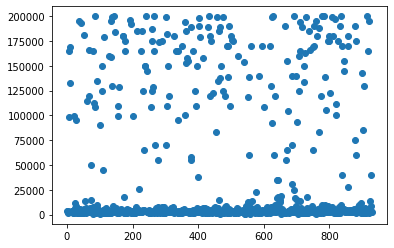

In [52]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(range(1,(h[h['ListPrice'] < 200000].shape[0])+1), h[h['ListPrice'] < 200000]['ListPrice'])

It seems like there's a big group of data points at the bottom. We can take a closer look

In [53]:
h[h['ListPrice'] < 20000]['ListPrice'].shape

(730,)

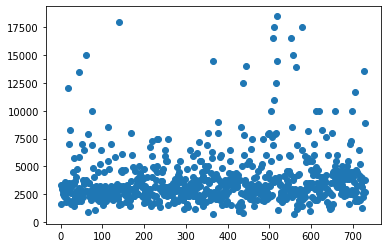

In [54]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(range(1,(h[h['ListPrice'] < 20000].shape[0])+1), h[h['ListPrice'] < 20000]['ListPrice'])

In [55]:
h[h['ListPrice'] < 10000]['ListPrice'].shape

(707,)

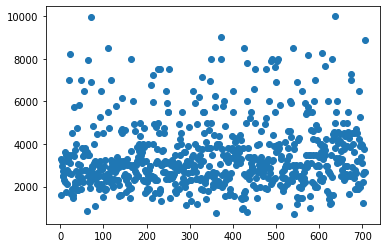

In [56]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(range(1,(h[h['ListPrice'] < 10000].shape[0])+1), h[h['ListPrice'] < 10000]['ListPrice'])

One option is to delete prices under 10,000. It is very unlikely to find a house with a price less than 10,000. This conglomorate of data could be appartment prices.

In [57]:
h = h[h['ListPrice'] > 10000]
h.shape

(4513, 18)

In [58]:
h.describe()

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,field_StoriesTotal,population,total_income,ListPrice,SquareFootageStructure_zscore,LotSquareFootage_zscore,YearBuilt_zscore,Bedrooms_zscore,BathsTotal_zscore,field_StoriesTotal_zscore,population_zscore,total_income_zscore,ListPrice_zscore
count,4513.000000,4.513000e+03,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4.513000e+03,4.513000e+03,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000
mean,2074.012852,4.088138e+04,1975.797252,3.406825,2.648571,1.473743,42375.410592,1.487175e+06,7.739804e+05,0.376065,0.039703,0.252348,0.566460,0.556300,0.240098,0.790182,0.594100,0.298519
std,1004.454876,3.719520e+05,25.312863,0.990767,1.043665,0.622982,21082.029053,8.708661e+05,6.998711e+05,0.342850,0.064573,0.169786,0.500742,0.441964,0.145190,0.609923,0.429576,0.335491
min,390.000000,1.000000e+00,1885.000000,1.000000,1.000000,1.000000,507.000000,1.533400e+04,1.100000e+04,0.000156,0.000014,0.005152,0.058641,0.324841,0.095008,0.003022,0.003903,0.000802
25%,1347.000000,5.562000e+03,1956.000000,3.000000,2.000000,1.000000,27031.000000,8.856600e+05,3.750000e+05,0.153161,0.036832,0.125312,0.058641,0.324841,0.095008,0.336364,0.275151,0.125995
50%,1810.000000,7.405000e+03,1978.000000,3.000000,3.000000,1.000000,38769.000000,1.309682e+06,5.590000e+05,0.300836,0.037415,0.235169,0.624680,0.347573,0.312544,0.645960,0.527421,0.234962
75%,2576.000000,1.089000e+04,1998.000000,4.000000,3.000000,2.000000,55020.000000,1.974978e+06,8.588880e+05,0.474408,0.037767,0.353617,0.741961,0.347573,0.312544,1.071991,0.819271,0.334309
max,7640.000000,1.288200e+07,2018.000000,7.000000,6.000000,8.000000,102878.000000,5.142438e+06,5.450000e+06,2.863596,2.354213,1.088307,2.791921,2.364812,2.540319,2.962034,2.902104,2.984726


In [59]:
h = h.reset_index()


In [65]:
data_proj = h.iloc[:,1:10]
data_proj

,SquareFootageStructure,LotSquareFootage,YearBuilt,Bedrooms,BathsTotal,field_StoriesTotal,population,total_income,ListPrice
0,3884.0,16013.0,1978.0,3.0,3.0,1.0,25374.0,4367172.0,2599000.0
1,1164.0,6611.0,1961.0,3.0,2.0,1.0,63557.0,952039.0,499999.0
2,2766.0,7331.0,1986.0,4.0,3.0,2.0,34017.0,1538628.0,929800.0
3,3339.0,20473.0,2001.0,4.0,4.0,1.0,39121.0,1205910.0,689900.0
4,1400.0,7728.0,1910.0,4.0,2.0,1.0,2030.0,15729.0,245000.0
...,...,...,...,...,...,...,...,...,...
4508,1007.0,10200.0,1959.0,3.0,1.0,1.0,86937.0,1345045.0,220000.0
4509,2300.0,6547.0,1924.0,4.0,2.0,1.0,51615.0,2770812.0,2445000.0
4510,1545.0,2178.0,1967.0,2.0,2.0,1.0,19664.0,756830.0,320000.0
4511,1404.0,7841.0,1964.0,2.0,2.0,1.0,20186.0,455073.0,228500.0


In [66]:
#export_csv = data_proj.to_csv(r'data_proj.csv', index = None, header=True)